In [18]:

import numpy as np
import pandas as pd

from numpy.random import rand as rand
from numpy.random import seed as seed
import matplotlib.pyplot as plt
from IPython.display import clear_output

import sys
import os

sys.path.append('..')
from src.utils import MyUtils

if (sys.modules.get('src.logistic_regression') is not None): 
    del sys.modules['src.logistic_regression']
import src.logistic_regression as logic


# Add the parent directory to the system path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

print(parent_dir)

/home/ho-yu/bsg


In [25]:
data_set = 'ionosphere'

print(data_set+'/'+'hello')

ionosphere/hello


In [11]:
# READ in data
# df_X_train = pd.read_csv(data_set+'/'+'X_train.csv', header=None)
# df_y_train = pd.read_csv(data_set+'/'+'y_train.csv', header=None)
# df_X_test = pd.read_csv(data_set+'/'+'X_test.csv', header=None)
# df_y_test = pd.read_csv(data_set+'/'+'y_test.csv', header=None)

df_X_train = pd.read_csv('../data/X_train.csv', header=None)
df_y_train = pd.read_csv('../data/y_train.csv', header=None)

df_X_test = pd.read_csv('../data/X_test.csv', header=None)
df_y_test = pd.read_csv('../data/y_test.csv', header=None)

# save in numpy arrays
X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()

# get training set size
n_train = X_train.shape[0]

# normalize all features to [0,1] or [-1,1]
X_all = MyUtils.normalize_neg1_pos1(np.concatenate((X_train, X_test), axis=0))


X_train = X_all[:n_train]
X_test = X_all[n_train:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(y_test)

(17, 3)
(17, 1)
(20, 3)
(20, 1)


In [27]:
#print(y_train[-10:])

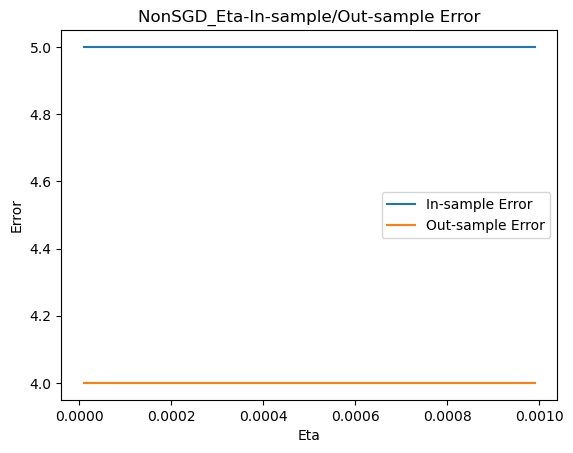

done


In [ ]:

# build the model

log_dir = "../log"

logistic = logic.LogisticRegression(verbose = True)

def run_test(model = "NonSGD", deg = 1, l = 0.1, e = 0.01, iterations = 100, minibatch_size = 20):
        
    # train the model
    if (model == "NonSGD"):
        logistic.fit(X_train, y_train, lam = l, eta = e, iterations = iterations, \
        SGD = False, mini_batch_size = minibatch_size, degree = deg)
    else:
        logistic.fit(X_train, y_train, lam = l, eta = e, iterations = iterations, \
        SGD = True, mini_batch_size = minibatch_size, degree = deg)
    


def plot_error(label = "results", column = "Epochs"):
    data = pd.read_csv(log_dir + "/" + label + ".csv") 
    # print(data.head())
    if "In-sample Error" in data.keys():
        plt.plot(data[column], data["In-sample Error"], label="In-sample Error")
    if "Out-sample Error" in data.keys():
        plt.plot(data[column], data["Out-sample Error"], label="Out-sample Error")
    # plt.plot(data[column], data["In-sample Error"] + data["Out-sample Error"], label="Sum Error")
    plt.title(label + "-In-sample/Out-sample Error") 
    plt.xlabel(column) 
    plt.ylabel("Error") 
    plt.legend()
    plt.savefig(log_dir + "/" + label + ".png")
    plt.show()

deg = 1    # optimal = 
l = 0.1    # optimal = 
e = 0.001  # optimal = 

model = "NonSGD"
column = "Degree"

label = model + "_" + column
logistic.initialize_log(label, X_test=X_test, y_test=y_test, in_sample=True, out_sample=True)


# test degree
for i in range(1, 4):
    print("degree: ", i)
    deg = i
    run_test(model = model, deg = i, l = l)
plot_error(label = label, column = column)

# test lambda, eta
# for i in range(1, 100, 1):
#     # l = 0.01 * i
#     # print("lambda: ", l)
#     e = 0.00001 * i
#     run_test(model = model, deg = deg, l = l, e = e)
# plot_error(label = label, column = column)


# test epochs, iterations
# for num_epochs in range(1000, 3000, 300):
#     num_epochs = num_epochs * 1
#     run_test(model = model, deg = deg, l = l, e = e, num_epochs = num_epochs)
# plot_error(label = label, column = column)




print("done") 

In [29]:
# run_test(model = "GD", deg = 3, l = 0.1, e = 0.01, num_epochs = 1000000)

# # plt.scatter(np.arange(len(lr.MSE)-100000), lr.MSE[100000:], marker='.')
# plt.scatter(np.arange(len(lr.MSE)), lr.MSE, marker='.')
# plt.xlabel('epoch % 100')
# plt.ylabel('MSE')
# plt.legend()
# plt.savefig("log/" + "GD_MSE" + ".png")
# plt.show()

In [30]:


# plot_error(label = "CF_deg", column = "Degree")
# plot_error(label = "CF_lam", column = "Lam")
# plot_error(label = "GD_deg", column = "Degree")
# plot_error(label = "GD_lam", column = "Lam")
# plot_error(label = "GD_eta", column = "Eta")
# plot_error(label = "GD_epochs", column = "Epochs")